## Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import calendar as cl
import time as tm
import dateutil as du
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD");

## Raw data

In [3]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,70,0,25-44,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005)
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,0,45-64,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003)
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,48,0,25-44,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74779,211262468,03/19/2020,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,M,19,0,25-44,M,BLACK,995035,216480,40.760866,-73.961070,POINT (-73.96107031199995 40.760865704000025)
74780,210363072,03/02/2020,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,77,0,25-44,M,BLACK,1001868,183705,40.670895,-73.936491,POINT (-73.93649068099995 40.67089521400004)
74781,209780339,02/19/2020,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,102,0,<18,M,BLACK,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899996 40.69843969400006)
74782,210613875,03/06/2020,198.0,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B1,F,B,52,0,25-44,M,BLACK HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200005)


## Below displays all the types of crimes committed, which cannot be seen on the raw data

In [4]:
df.PD_DESC.unique()

array(['ASSAULT 2,1,UNCLASSIFIED', 'TRAFFIC,UNCLASSIFIED INFRACTIO',
       'MARIJUANA, SALE 4 & 5', 'AGGRAVATED HARASSMENT 2',
       'STRANGULATION 1ST', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'SEXUAL ABUSE 3,2', 'LARCENY,PETIT FROM OPEN AREAS,',
       'CRIMINAL MISCHIEF,UNCLASSIFIED 4', 'RAPE 3',
       'FORGERY,ETC.,UNCLASSIFIED-FELO', 'CONTROLLED SUBSTANCE,INTENT TO',
       'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'RECKLESS ENDANGERMENT 1',
       'OBSTR BREATH/CIRCUL', 'LARCENY,GRAND FROM OPEN AREAS, UNATTENDED',
       'CRIMINAL MIS 2 & 3', 'WEAPONS, POSSESSION, ETC', 'ASSAULT 3',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'FUGITIVE/OTHER STATES',
       'POSSESSION HYPODERMIC INSTRUME', 'CONTROLLED SUBSTANCE,SALE 3',
       'PUBLIC ADMINISTRATION,UNCLASSI', 'NY STATE LAWS,UNCLASSIFIED FEL',
       'MENACING,UNCLASSIFIED', 'LARCENY,GRAND FROM PERSON,UNCL',
       'CONTEMPT,CRIMINAL', 'WEAPONS POSSESSION 1 & 2',
       'TRESPASS 3, CRIMINAL', 'U.S. CODE UNCLASSIFIED',
       'OBSCENE M

## Renaming the columns we are going to be honing in on

In [5]:
df.rename(columns={'OFNS_DESC': 'OFFENSE', 'ARREST_BORO': 'BOROUGH'}, inplace=True)
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFFENSE,LAW_CODE,LAW_CAT_CD,BOROUGH,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,70,0,25-44,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005)
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,0,45-64,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003)
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,48,0,25-44,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74779,211262468,03/19/2020,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,M,19,0,25-44,M,BLACK,995035,216480,40.760866,-73.961070,POINT (-73.96107031199995 40.760865704000025)
74780,210363072,03/02/2020,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,77,0,25-44,M,BLACK,1001868,183705,40.670895,-73.936491,POINT (-73.93649068099995 40.67089521400004)
74781,209780339,02/19/2020,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,102,0,<18,M,BLACK,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899996 40.69843969400006)
74782,210613875,03/06/2020,198.0,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B1,F,B,52,0,25-44,M,BLACK HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200005)


## Renaming the variables in the 'BOROUGH' column to full name

In [6]:
df['BOROUGH'] = df['BOROUGH'].replace(['K','M','Q','B','S'],['BROOKLYN','MANHATTAN','QUEENS','THE BRONX','STATEN ISLAND'])
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFFENSE,LAW_CODE,LAW_CAT_CD,BOROUGH,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,BROOKLYN,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,MANHATTAN,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,BROOKLYN,70,0,25-44,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005)
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,QUEENS,101,0,45-64,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003)
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,THE BRONX,48,0,25-44,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74779,211262468,03/19/2020,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,MANHATTAN,19,0,25-44,M,BLACK,995035,216480,40.760866,-73.961070,POINT (-73.96107031199995 40.760865704000025)
74780,210363072,03/02/2020,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,BROOKLYN,77,0,25-44,M,BLACK,1001868,183705,40.670895,-73.936491,POINT (-73.93649068099995 40.67089521400004)
74781,209780339,02/19/2020,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,QUEENS,102,0,<18,M,BLACK,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899996 40.69843969400006)
74782,210613875,03/06/2020,198.0,CRIMINAL CONTEMPT 1,126.0,MISCELLANEOUS PENAL LAW,PL 21551B1,F,THE BRONX,52,0,25-44,M,BLACK HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200005)


## Created a new Dataframe so that we could focus on the specific data points we wanted to compare, which were Arrest_date, Offense, and Age_Group.

In [7]:
df1 = df[['ARREST_DATE','OFFENSE','BOROUGH','AGE_GROUP','PERP_SEX','PERP_RACE']]
df1

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
0,06/18/2020,FELONY ASSAULT,BROOKLYN,18-24,F,WHITE HISPANIC
1,03/04/2020,OTHER TRAFFIC INFRACTION,MANHATTAN,25-44,M,BLACK HISPANIC
2,02/07/2020,DANGEROUS DRUGS,BROOKLYN,25-44,M,WHITE
3,01/17/2020,OFF. AGNST PUB ORD SENSBLTY &,QUEENS,45-64,M,BLACK HISPANIC
4,06/23/2020,FELONY ASSAULT,THE BRONX,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...
74779,03/19/2020,VEHICLE AND TRAFFIC LAWS,MANHATTAN,25-44,M,BLACK
74780,03/02/2020,DANGEROUS DRUGS,BROOKLYN,25-44,M,BLACK
74781,02/19/2020,GRAND LARCENY,QUEENS,<18,M,BLACK
74782,03/06/2020,MISCELLANEOUS PENAL LAW,THE BRONX,25-44,M,BLACK HISPANIC


## Filtered Arrest_Date by quarter. Below displays Quarter 1 information: 01/01/2020-3/31/2020

In [8]:
q1=df1[(df1.ARREST_DATE >= '01/01/2020') & (df1.ARREST_DATE <= '03/31/2020')].sort_values(['ARREST_DATE'], ascending=True)
q1

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
74783,01/01/2020,DANGEROUS DRUGS,BROOKLYN,25-44,M,BLACK
54257,01/01/2020,ASSAULT 3 & RELATED OFFENSES,QUEENS,25-44,M,BLACK HISPANIC
61389,01/01/2020,OFFENSES AGAINST THE PERSON,MANHATTAN,18-24,M,BLACK HISPANIC
8551,01/01/2020,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,45-64,M,WHITE HISPANIC
70253,01/01/2020,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,25-44,M,BLACK HISPANIC
...,...,...,...,...,...,...
4969,03/31/2020,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,25-44,M,WHITE
37326,03/31/2020,BURGLARY,BROOKLYN,25-44,M,BLACK
37219,03/31/2020,FELONY ASSAULT,MANHATTAN,25-44,M,BLACK
38858,03/31/2020,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,25-44,M,BLACK


## Filtered Arrest_Date by quarter. Below displays Quarter 2 information: 04/01/2020-6/30/2020

In [9]:
q2=df1[(df1.ARREST_DATE >= '04/01/2020') & (df1.ARREST_DATE <= '6/30/2020')].sort_values(['ARREST_DATE'], ascending=True)
q2

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
63152,04/01/2020,DANGEROUS DRUGS,THE BRONX,45-64,M,BLACK
58596,04/01/2020,UNAUTHORIZED USE OF A VEHICLE,QUEENS,<18,M,BLACK
54537,04/01/2020,GRAND LARCENY,BROOKLYN,18-24,F,BLACK
9485,04/01/2020,ROBBERY,QUEENS,25-44,M,WHITE HISPANIC
62526,04/01/2020,DANGEROUS WEAPONS,MANHATTAN,45-64,M,BLACK
...,...,...,...,...,...,...
49521,06/30/2020,MURDER & NON-NEGL. MANSLAUGHTE,MANHATTAN,25-44,M,BLACK
1824,06/30/2020,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,18-24,M,WHITE HISPANIC
74103,06/30/2020,OTHER TRAFFIC INFRACTION,QUEENS,18-24,M,BLACK
65429,06/30/2020,GRAND LARCENY,MANHATTAN,25-44,M,BLACK


## Grouped by Age and then counted offenses per age group (no filters)

## Below we are able to identify the number of offenses grouped by borough and Brooklyn was the most dangerous borough in Q1 and Q2. Followed by Manhattan and The Bronx, respectively.

In [10]:
borosq1=q1.groupby(['BOROUGH'])['OFFENSE'].count().sort_values(ascending=False)
borosq1

BOROUGH
BROOKLYN         12085
MANHATTAN        11401
THE BRONX        10058
QUEENS            9297
STATEN ISLAND     1949
Name: OFFENSE, dtype: int64

In [11]:
borosq2=q2.groupby(['BOROUGH'])['OFFENSE'].count().sort_values(ascending=False)
borosq2

BOROUGH
BROOKLYN         7931
THE BRONX        7095
MANHATTAN        7089
QUEENS           6540
STATEN ISLAND    1279
Name: OFFENSE, dtype: int64

## Below is the above information in bar chart form

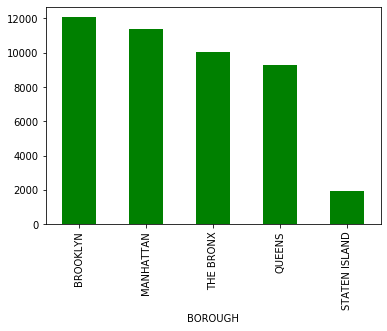

In [12]:
borosq1.plot.bar(x='BOROUGH',y='OFFENSE', color='Green')

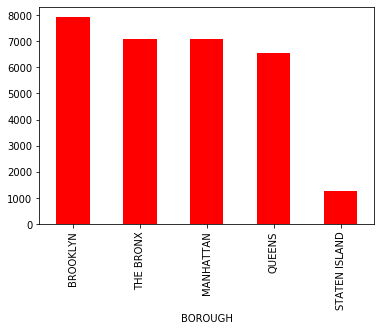

In [13]:
borosq2.plot.bar(x='BOROUGH',y='OFFENSE',color='red')

## All offenses reported from 1/1/2020-6/30/2020 (Q1 & Q2).

In [14]:
df2=df1.groupby(['AGE_GROUP'])['OFFENSE'].count().sort_values(ascending=False)
df2

AGE_GROUP
25-44    40781
18-24    15234
45-64    14383
<18       3449
65+        877
Name: OFFENSE, dtype: int64

## Q1: Grouped by Age and then counted offenses per age group. Based on what we originally proposed, we found that most offenses were committed by the "middle-aged" group, rather than the younger age group of 18-24.

In [15]:
df3=q1.groupby(['AGE_GROUP'])['OFFENSE'].count().sort_values(ascending=False)
df3

AGE_GROUP
25-44    24379
45-64     8892
18-24     8765
<18       2212
65+        542
Name: OFFENSE, dtype: int64

## Q1 data

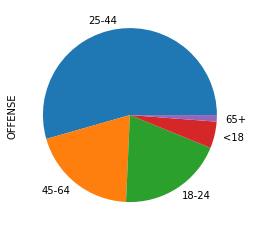

In [17]:
df3.plot.pie()

## Q2: Grouped by Age and then counted offenses per age group (no filters). 25-44 still at the top of the list in Q2, however, less offenses were reported and we can conclude that perhaps the stay-at-home, curfews, and quarantine regulations were being adhered to. 

In [16]:
df4=q2.groupby(['AGE_GROUP'])['OFFENSE'].count().sort_values(ascending=False)
df4

AGE_GROUP
25-44    16402
18-24     6469
45-64     5491
<18       1237
65+        335
Name: OFFENSE, dtype: int64

## Q2 data

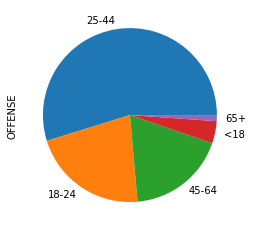

In [18]:
df4.plot.pie()

## Filtered by age group (18-24) for Q1

In [19]:
df5=q1[q1['AGE_GROUP'] == '18-24']
df5

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
61389,01/01/2020,OFFENSES AGAINST THE PERSON,MANHATTAN,18-24,M,BLACK HISPANIC
8724,01/01/2020,ASSAULT 3 & RELATED OFFENSES,QUEENS,18-24,M,WHITE HISPANIC
19803,01/01/2020,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,18-24,F,WHITE HISPANIC
68954,01/01/2020,DANGEROUS WEAPONS,BROOKLYN,18-24,M,BLACK
60913,01/01/2020,OFFENSES AGAINST PUBLIC ADMINI,THE BRONX,18-24,F,BLACK
...,...,...,...,...,...,...
23951,03/31/2020,DANGEROUS DRUGS,MANHATTAN,18-24,M,WHITE HISPANIC
38474,03/31/2020,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,18-24,M,BLACK
66226,03/31/2020,ROBBERY,MANHATTAN,18-24,M,BLACK
38271,03/31/2020,FELONY ASSAULT,QUEENS,18-24,M,ASIAN / PACIFIC ISLANDER


## Filtered by age group (18-24) for Q2

In [20]:
df6=q2[q2['AGE_GROUP'] == '18-24']
df6

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
54537,04/01/2020,GRAND LARCENY,BROOKLYN,18-24,F,BLACK
63621,04/01/2020,POSSESSION OF STOLEN PROPERTY,BROOKLYN,18-24,M,BLACK
35655,04/01/2020,FOR OTHER AUTHORITIES,MANHATTAN,18-24,M,BLACK
45067,04/01/2020,MISCELLANEOUS PENAL LAW,THE BRONX,18-24,M,BLACK
21106,04/01/2020,FELONY ASSAULT,BROOKLYN,18-24,F,WHITE
...,...,...,...,...,...,...
20876,06/30/2020,PETIT LARCENY,QUEENS,18-24,M,WHITE HISPANIC
66682,06/30/2020,ROBBERY,THE BRONX,18-24,M,BLACK HISPANIC
63645,06/30/2020,DANGEROUS WEAPONS,THE BRONX,18-24,M,BLACK
1824,06/30/2020,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,18-24,M,WHITE HISPANIC


## Filtered by age group (65+) for Q1

In [21]:
df7=q1[q1['AGE_GROUP'] == '65+']
df7

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
21802,01/01/2020,SEX CRIMES,MANHATTAN,65+,M,WHITE
1565,01/01/2020,FELONY ASSAULT,MANHATTAN,65+,F,WHITE HISPANIC
12171,01/01/2020,ASSAULT 3 & RELATED OFFENSES,THE BRONX,65+,M,WHITE HISPANIC
31677,01/02/2020,FELONY ASSAULT,MANHATTAN,65+,M,BLACK
25815,01/02/2020,POSSESSION OF STOLEN PROPERTY,THE BRONX,65+,M,WHITE HISPANIC
...,...,...,...,...,...,...
74714,03/27/2020,FELONY ASSAULT,BROOKLYN,65+,M,BLACK HISPANIC
38615,03/28/2020,FELONY ASSAULT,QUEENS,65+,M,ASIAN / PACIFIC ISLANDER
42585,03/30/2020,NYS LAWS-UNCLASSIFIED FELONY,QUEENS,65+,M,ASIAN / PACIFIC ISLANDER
58916,03/31/2020,POSSESSION OF STOLEN PROPERTY,QUEENS,65+,M,BLACK


## Filtered by age group (65+) for Q2

In [22]:
df8=q2[q2['AGE_GROUP'] == '65+']
df8

,ARREST_DATE,OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
32252,04/01/2020,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,65+,M,BLACK
40756,04/01/2020,FELONY ASSAULT,QUEENS,65+,M,BLACK
14494,04/01/2020,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,65+,M,WHITE
15862,04/01/2020,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,65+,M,WHITE
50445,04/01/2020,FELONY ASSAULT,THE BRONX,65+,M,BLACK
...,...,...,...,...,...,...
37295,06/30/2020,FELONY ASSAULT,MANHATTAN,65+,M,ASIAN / PACIFIC ISLANDER
34543,06/30/2020,ASSAULT 3 & RELATED OFFENSES,QUEENS,65+,M,BLACK
33043,06/30/2020,FELONY ASSAULT,MANHATTAN,65+,M,BLACK
44569,06/30/2020,ASSAULT 3 & RELATED OFFENSES,QUEENS,65+,F,ASIAN / PACIFIC ISLANDER


## Top 5 offenses for Q1: Commonality between both Quarters (ASSAULT 3 & RELATED OFFENSES, FELONY ASSAULT, DANGEROUS DRUGS)

In [23]:
offq1=q1.groupby(['OFFENSE'])['OFFENSE'].count().sort_values(ascending=False)
offq1.head()

OFFENSE
ASSAULT 3 & RELATED OFFENSES    6866
PETIT LARCENY                   4232
DANGEROUS DRUGS                 4220
FELONY ASSAULT                  3633
MISCELLANEOUS PENAL LAW         2678
Name: OFFENSE, dtype: int64

## Top 5 offenses for Q2

In [24]:
offq2=q2.groupby(['OFFENSE'])['OFFENSE'].count().sort_values(ascending=False)
offq2.head()

OFFENSE
ASSAULT 3 & RELATED OFFENSES    5252
FELONY ASSAULT                  3025
PETIT LARCENY                   2280
BURGLARY                        2082
DANGEROUS DRUGS                 2073
Name: OFFENSE, dtype: int64

## Q2 info filtered by the 18-24 age group

In [25]:
offq22=df6.groupby(['OFFENSE'])['OFFENSE'].count().sort_values(ascending=False)
offq22.head()

OFFENSE
ASSAULT 3 & RELATED OFFENSES    943
FELONY ASSAULT                  579
ROBBERY                         472
DANGEROUS WEAPONS               468
BURGLARY                        455
Name: OFFENSE, dtype: int64

## Q2 info filtered by the 65+ age group

In [26]:
offq23=df8.groupby(['OFFENSE'])['OFFENSE'].count().sort_values(ascending=False)
offq23.head()

OFFENSE
ASSAULT 3 & RELATED OFFENSES      85
FELONY ASSAULT                    63
PETIT LARCENY                     21
SEX CRIMES                        21
CRIMINAL MISCHIEF & RELATED OF    17
Name: OFFENSE, dtype: int64

## Commonality with the information above: Q2, less offenses were documented for both age groups. Potentially because people were following curfews and stay-at-home orders.

## ASSAULT 3 & RELATED OFFENSE and FELONY ASSAULT are the most common offenses regardless of the quarter and the age group.